## Fraud Detection
In this project, our goal is to construct a predictive model that can identify potentially fraudulent transactions for a financial organization. The insights derived from the model's analysis will be utilized to formulate a practical and effective strategy. 

### Dataset Overview

In this project, we utilize a comprehensive dataset specifically curated for detecting fraudulent transactions. 

The dataset is apparently generated using PaySim, a mobile money simulator that closely models real-world transactions. The dataset contains over 6 million transactions, each of which is described by 11 features. The features are as follows:
* `step`: the unit of time in real-world seconds.
* `type`: the type of transaction, which can be one of the following: 
    *    `CASH-IN`, 
    *    `CASH-OUT`, 
    *    `DEBIT`, 
    *    `PAYMENT`,
    *    `TRANSFER`.
* `amount`: the amount of the transaction in local currency.
* `nameOrig`: the customer who initiated the transaction.
* `oldbalanceOrg`: the customer's balance before the transaction.
* `newbalanceOrig`: the customer's balance after the transaction.
* `nameDest`: the recipient ID of the transaction.
* `oldbalanceDest`: the recipient's balance before the transaction.
* `newbalanceDest`: the recipient's balance after the transaction.
* `isFraud`: whether the transaction is fraudulent or not.
* `isFlaggedFraud`: whether the transaction is flagged as fraudulent by the system.

Reference :
<br>PaySim research paper 
<br>*E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016*

### Libraries

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

C:\Users\adity\AppData\Local\Temp\ipykernel_6648\2203226735.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Acquisition

In [3]:
# importing the dataset
frd = pd.read_csv("fraud.csv")
frd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#Checking for Null Values
frd.isnull().values.any()

False

The dataset contains no missing values.

## Exploratory Data Analysis

### Representation of each attribute

In [5]:
frd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Here we know Column Name `type` is categorical data, 

And `nameOrig` and `nameDest` is user specific object data.

Also the memory usage is 534.0+ MB so moving it into cloud a better idea. 

So, for visualization we will separate these data from the dataset.

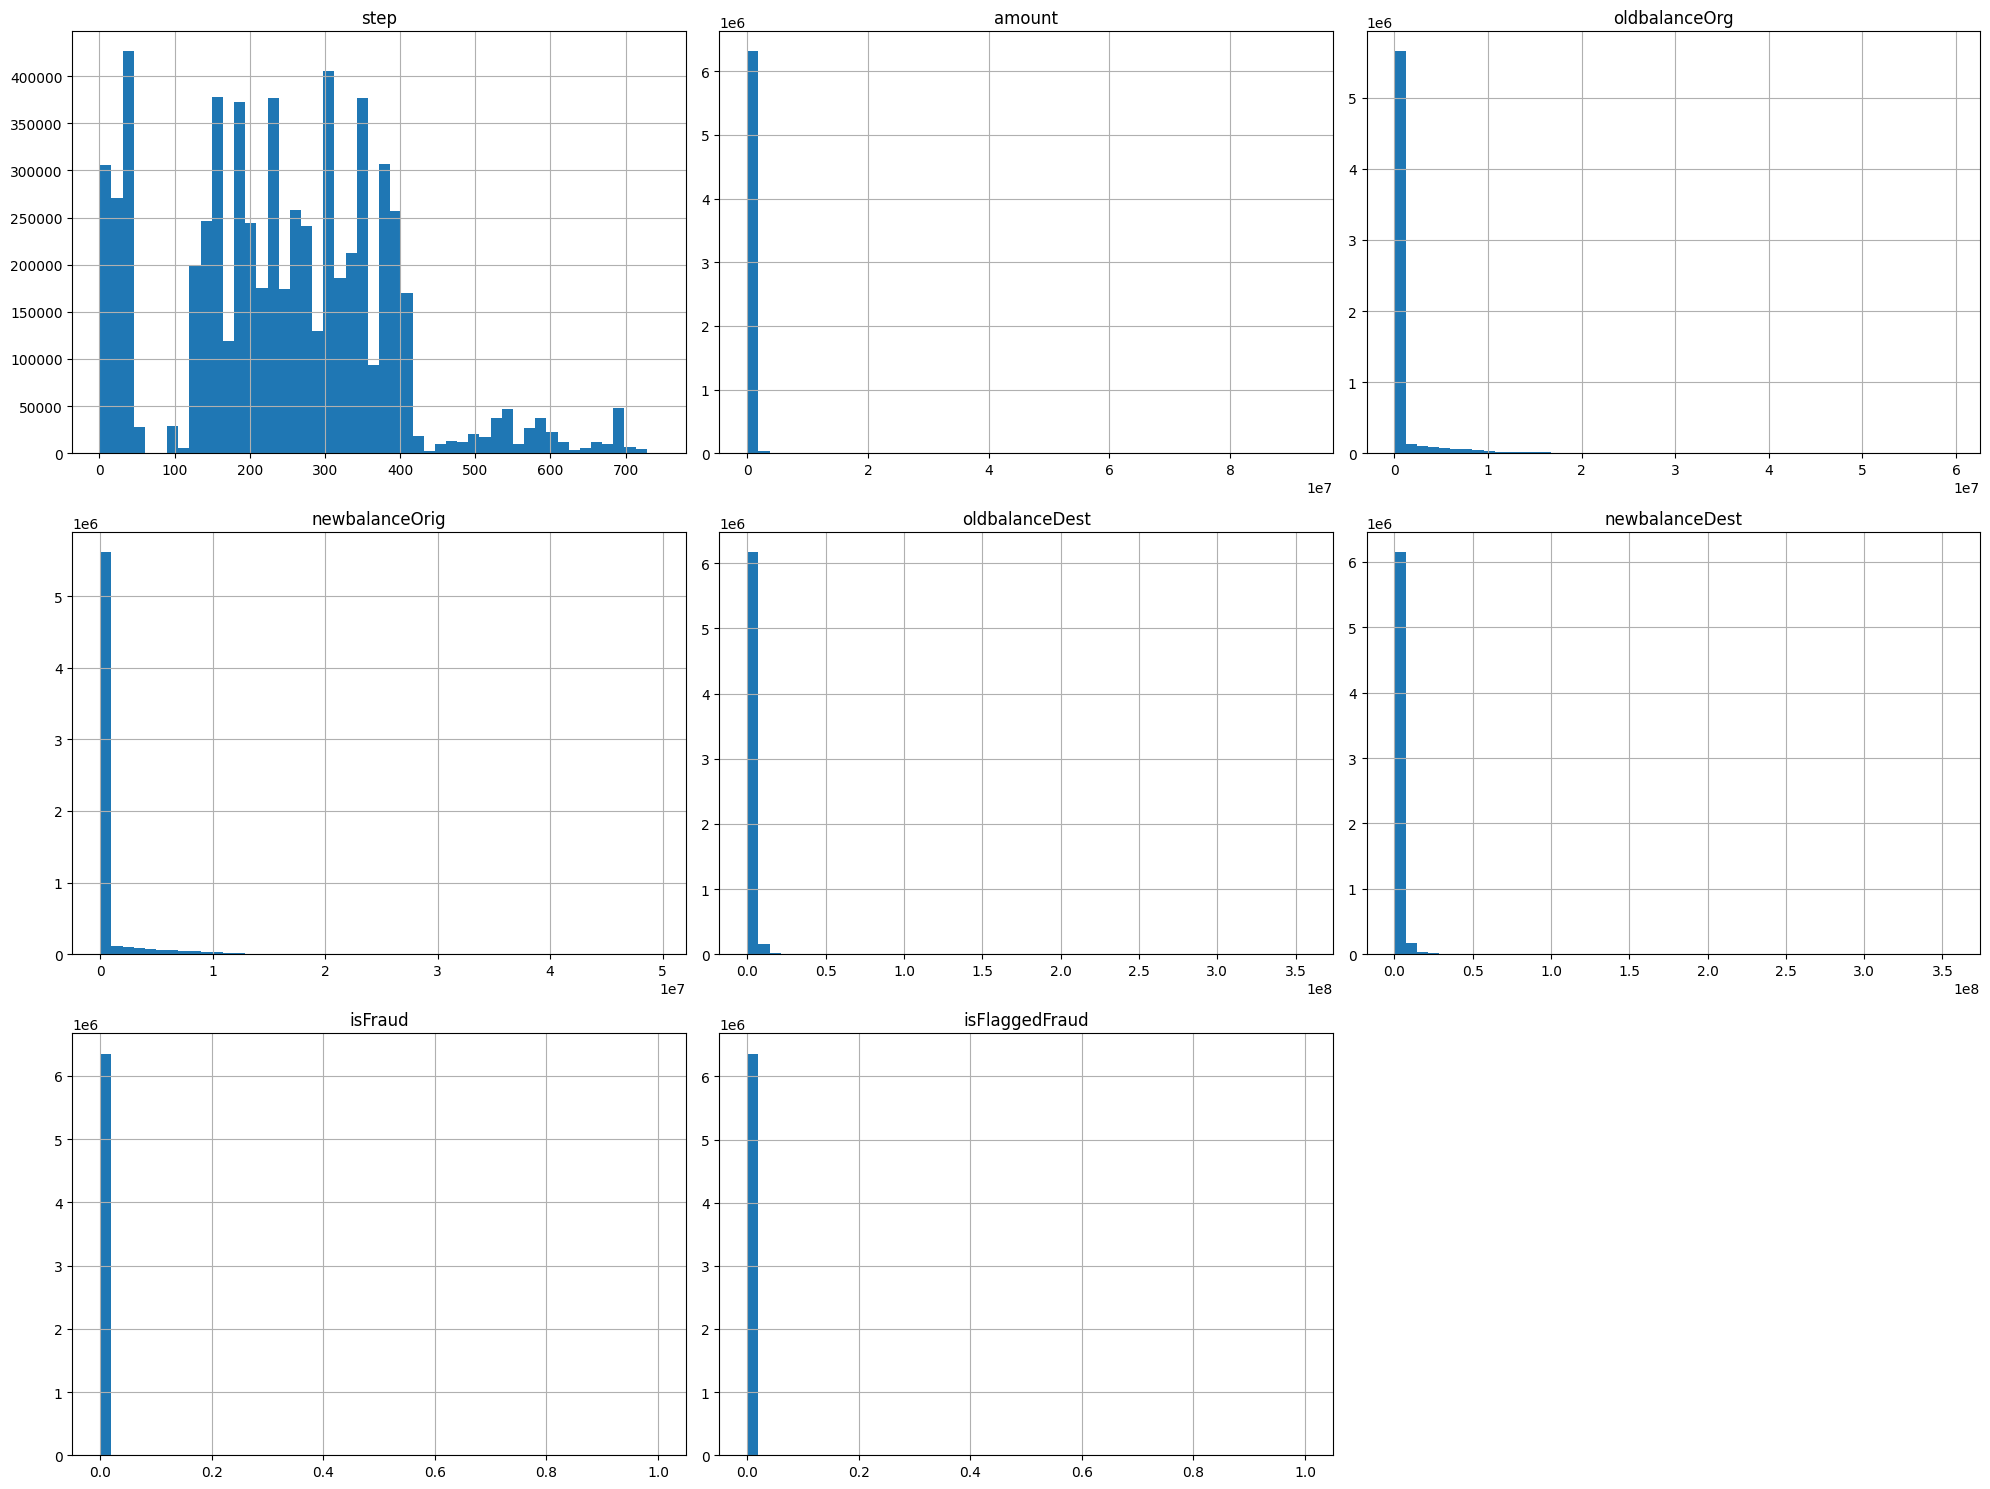

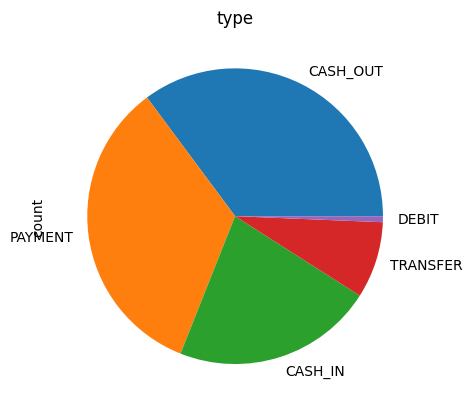

KeyboardInterrupt: 

In [6]:
frd.hist(bins=50, figsize=(20,15))
plt.tight_layout()  # To ensure non-overlapping subplots
plt.show()

# For non-numeric columns
for column in frd.select_dtypes(include=['object']).columns:
    frd[column].value_counts().plot(kind='pie', title=column)
    plt.show()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


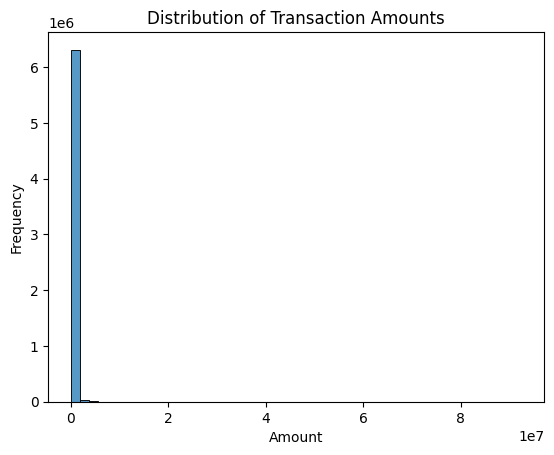

In [11]:

print(frd['amount'].describe())

print(frd['amount'].describe())
sns.histplot(frd['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

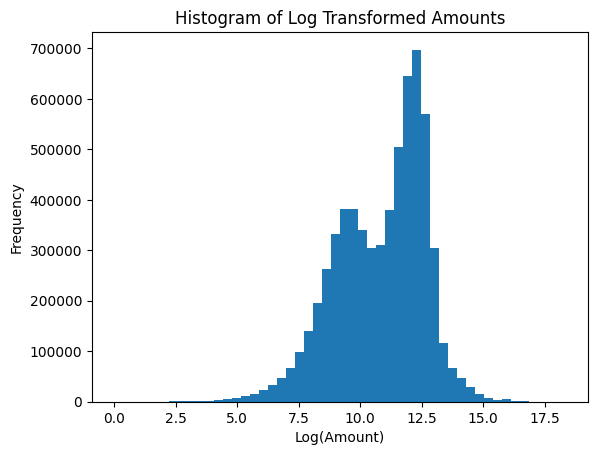

In [12]:
frd['log_amount'] = np.log(frd['amount'] + 1)  # Adding 1 to avoid log(0)

plt.hist(frd['log_amount'], bins=50)
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Amounts')
plt.show()